In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)

In [363]:
df = pd.read_csv("rentfaster.csv")
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [364]:
df.shape

(25771, 18)

In [365]:
df.drop(['rentfaster_id', 'address','link','availability_date','smoking','cats','dogs', 'lease_term'], axis=1, inplace=True)

In [366]:
df.isnull().sum()

city             0
province         0
latitude         0
longitude        0
type             0
price            0
beds           132
baths          134
sq_feet       4112
furnishing       0
dtype: int64

In [367]:
df.dropna(inplace=True)

In [368]:
df.head()

,city,province,latitude,longitude,type,price,beds,baths,sq_feet,furnishing
0,Airdrie,Alberta,51.305962,-114.012515,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished
1,Airdrie,Alberta,51.305962,-114.012515,Townhouse,2695.0,3 Beds,2.5,1496,Unfurnished
2,Airdrie,Alberta,51.305962,-114.012515,Townhouse,2295.0,2 Beds,2.5,1180,Unfurnished
3,Airdrie,Alberta,51.305962,-114.012515,Townhouse,2095.0,2 Beds,2.5,1403,Unfurnished
4,Airdrie,Alberta,51.305962,-114.012515,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished


In [369]:
no_beds = df['beds'] == 'none Beds'
df = df[~no_beds]

In [370]:
df.beds.unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds',
       '6 Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [371]:
df.replace('Studio', '0 Std')
df.beds.unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds',
       '6 Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [372]:
df['beds'].dtype

dtype('O')

In [373]:
df['bedrooms'] = df['beds'].apply(lambda x: int(x.split(' ')[0]) if x.split(' ')[0] != 'Studio' else 0)

In [374]:
import regex as re
df['bathrooms'] = df['baths'].apply(lambda x: float(x) if x != 'none'else 0)

In [375]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [376]:
df[~df.sq_feet.apply(is_float)]

,city,province,latitude,longitude,type,price,beds,baths,sq_feet,furnishing,bedrooms,bathrooms
7,Airdrie,Alberta,51.271725,-114.020135,Apartment,2390.0,Studio,1,361 Sq. Ft.,Unfurnished,0,1.0
8,Airdrie,Alberta,51.271725,-114.020135,Apartment,3615.0,1 Bed,1,525 Sq. Ft.,Unfurnished,1,1.0
9,Airdrie,Alberta,51.271725,-114.020135,Apartment,4520.0,2 Beds,1,810 Sq. Ft.,Unfurnished,2,1.0
10,Airdrie,Alberta,51.271725,-114.020135,Apartment,1930.0,Studio,1,265 Sq. Ft.,Unfurnished,0,1.0
62,Airdrie,Alberta,51.292467,-114.009733,House,2100.0,1 Bed,1,700 Sq. Ft.,Unfurnished,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14718,Vancouver,British Columbia,49.257618,-123.183974,Main Floor,3400.0,2 Beds,1,Approx 1000,Furnished,2,1.0
19111,Ottawa,Ontario,45.237091,-75.735417,Basement,2200.0,2 Beds,1,"1,001",Unfurnished,2,1.0
25152,Regina,Saskatchewan,50.449920,-104.617560,Apartment,1399.0,Studio,1,313-394,Furnished,0,1.0
25153,Regina,Saskatchewan,50.449920,-104.617560,Apartment,1475.0,1 Bed,1,388-434,Furnished,1,1.0


In [377]:
def convert_sqft_num(x):
    tokens = x.split('-')

    if len(tokens) == 2:
        try:
            return (float(tokens[0]) + float(tokens[1]))/2
        except: 
            return None
    if 'Sq. Ft' in x and len(x) < 13:
        try:
            return float(''.join([c for c in x if c.isdigit()]))
        except:
            return None
    try:
        return float(x)
    except:
        return None

In [378]:
df2 = df.copy()
df2['sq_feet'] = df2['sq_feet'].apply(convert_sqft_num)
df2[~df2.sq_feet.apply(is_float)]

,city,province,latitude,longitude,type,price,beds,baths,sq_feet,furnishing,bedrooms,bathrooms


In [379]:
df3 = df2.dropna()

In [380]:
df3.describe()

,latitude,longitude,price,sq_feet,bedrooms,bathrooms
count,21196.000000,21196.000000,21196.000000,21196.000000,21196.000000,21196.000000
mean,48.750633,-99.703774,2198.952952,885.076992,1.723438,1.415432
std,3.652405,18.017863,918.583084,499.297172,0.950752,0.644030
min,40.741802,-128.661880,0.000000,0.000000,0.000000,0.000000
25%,45.398557,-114.073063,1675.000000,608.000000,1.000000,1.000000
50%,50.872245,-113.495944,2099.000000,800.000000,2.000000,1.000000
75%,51.082544,-79.394545,2599.000000,1024.000000,2.000000,2.000000
max,62.459246,-52.695472,26500.000000,11700.000000,9.000000,7.500000


In [381]:
len(df3.city.unique())

246

In [382]:
df3.city =  df3.city.apply(lambda x: x.strip())
city = df3.groupby('city')['city'].agg('count').sort_values(ascending=False)
city.head(30)

C:\Users\vaidik16\AppData\Local\Temp\ipykernel_4036\325817755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.city =  df3.city.apply(lambda x: x.strip())


city
Calgary           7511
Toronto           2574
Edmonton          2317
Montréal          1408
Ottawa             899
Winnipeg           786
London             305
Saskatoon          299
Regina             220
Kingston           198
Halifax            187
Vancouver          185
Mississauga        179
Victoria           158
Kitchener          135
Hamilton           127
Brampton           118
Pointe-Claire      118
Laval              118
Welland            113
Airdrie            106
Oshawa              83
Windsor             82
Kelowna             82
Burnaby             77
Nanaimo             76
Medicine Hat        75
Côte Saint-Luc      71
Lethbridge          68
Barrie              65
Name: city, dtype: int64

In [383]:
len(city[city <= 20])
city_less_than_10 =  city[city <= 10]
df3.city = df3.city.apply(lambda x: 'Other' if x in city_less_than_10 else x)

C:\Users\vaidik16\AppData\Local\Temp\ipykernel_4036\3850371488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.city = df3.city.apply(lambda x: 'Other' if x in city_less_than_10 else x)


In [384]:
df3[df3.city == 'Other']

,city,province,latitude,longitude,type,price,beds,baths,sq_feet,furnishing,bedrooms,bathrooms
134,Other,Alberta,50.719430,-113.906820,Acreage,3050.0,3 Beds,2,1520.0,Unfurnished,3,2.0
136,Other,Alberta,50.677181,-113.880120,House,1950.0,3 Beds,1,1150.0,Unfurnished,3,1.0
137,Other,Alberta,51.257845,-113.979751,Main Floor,2395.0,2 Beds,2.5,1536.0,Unfurnished,2,2.5
154,Other,Alberta,51.382407,-113.533031,Apartment,950.0,1 Bed,1,750.0,Unfurnished,1,1.0
155,Other,Alberta,51.382407,-113.533031,Apartment,1150.0,2 Beds,1,850.0,Unfurnished,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25104,Other,Saskatchewan,52.779398,-108.281001,Duplex,1350.0,2 Beds,1,1000.0,Unfurnished,2,1.0
25106,Other,Saskatchewan,50.485913,-104.420301,Apartment,2500.0,3 Beds,2,0.0,Unfurnished,3,2.0
25725,Other,Saskatchewan,52.338356,-106.574924,Townhouse,2125.0,3 Beds,3,1366.0,Unfurnished,3,3.0
25726,Other,Saskatchewan,52.338356,-106.574924,Townhouse,2199.0,3 Beds,3,1366.0,Unfurnished,3,3.0


In [385]:
df4.describe()

,latitude,longitude,price,sq_feet,bedrooms,bathrooms
count,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000
mean,48.746362,-99.969886,2254.925531,931.415241,1.783972,1.438278
std,3.587435,18.008702,903.596704,476.822663,0.915319,0.654172
min,40.741802,-128.661880,0.000000,401.000000,0.000000,0.000000
25%,45.400411,-114.074822,1700.750000,640.000000,1.000000,1.000000
50%,50.880283,-113.506977,2130.000000,830.000000,2.000000,1.000000
75%,51.078550,-79.398883,2610.000000,1050.000000,2.000000,2.000000
max,56.767224,-52.708727,26500.000000,11700.000000,9.000000,7.500000


In [386]:
## Outlier Detection
df4 = df3[df3.sq_feet > 400]
df5 = df4[~(df4.sq_feet / df4.bathrooms < 300)]
len(df5)

19916

In [387]:
def remove_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        mean = float(np.mean(subdf.sq_feet))
        std = float(np.std(subdf.sq_feet))
        reduced_df = subdf[(subdf.sq_feet > (mean - 1*std)) & (subdf.sq_feet < (mean + 1*std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


In [388]:
df6 = remove_sqft_outliers(df5)
df6.shape

(16229, 12)

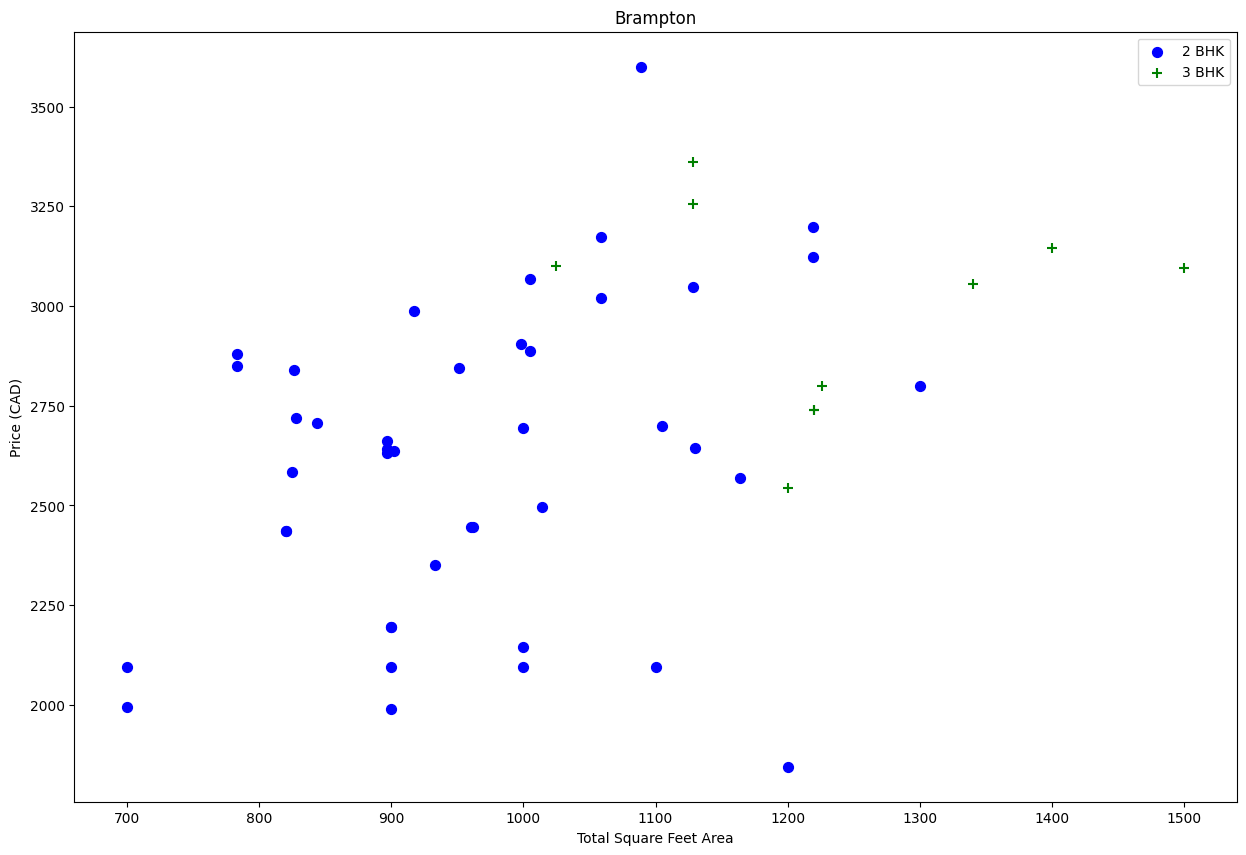

In [389]:
# A 2000 sqft house with 3 beds has a lower price than a 2000 sqft house with 2 beds (both in toronto): we are going to filter out such values. 
def plot_scatter_chart(df, city):
    beds2 = df[(df.city == city) & (df.bedrooms ==2)]
    beds3 = df[(df.city == city) & (df.bedrooms ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds2.sq_feet,beds2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(beds3.sq_feet,beds3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (CAD)")
    plt.title(city)
    plt.legend()

plot_scatter_chart(df6, 'Brampton')

Text(0, 0.5, 'Count')

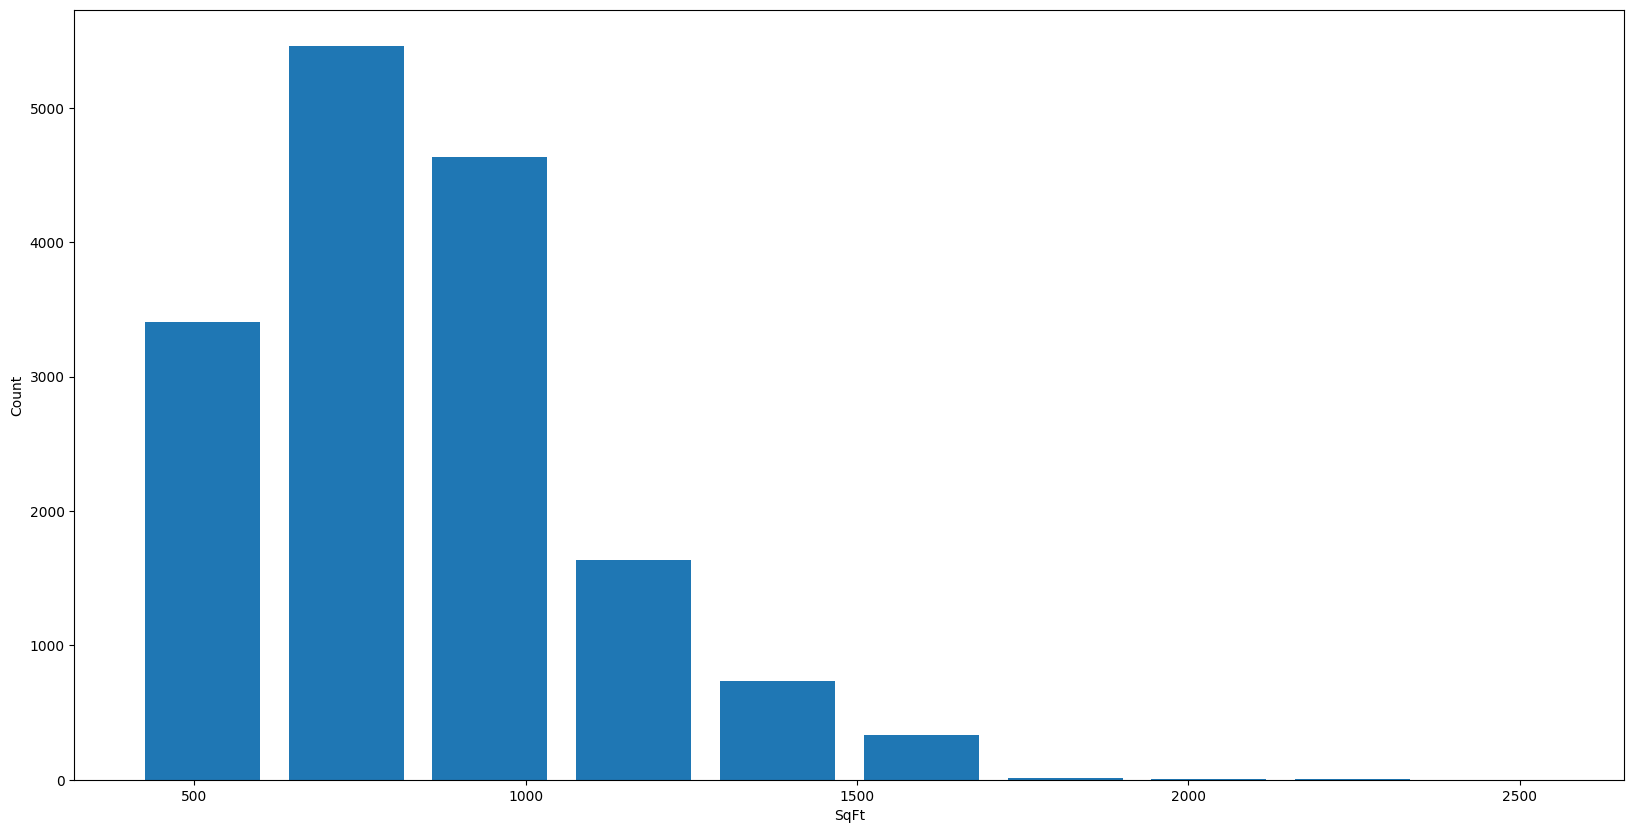

In [390]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.sq_feet, rwidth=0.8)
plt.xlabel("SqFt")
plt.ylabel('Count')

In [474]:
df7 = df6[df6.bathrooms < df6.bedrooms +2]
df8 = df7.drop(['beds', 'baths'], axis=1)
df8

,city,province,latitude,longitude,type,price,sq_feet,furnishing,bedrooms,bathrooms
0,Abbotsford,British Columbia,49.048024,-122.301601,Apartment,1450.0,685.0,Unfurnished,1,1.0
1,Abbotsford,British Columbia,49.046790,-122.340378,Apartment,2100.0,765.0,Unfurnished,2,1.0
2,Abbotsford,British Columbia,49.046790,-122.340378,Apartment,1600.0,538.0,Unfurnished,1,1.0
3,Abbotsford,British Columbia,49.046790,-122.340378,Apartment,1600.0,538.0,Unfurnished,1,1.0
4,Abbotsford,British Columbia,49.046790,-122.340378,Apartment,1675.0,538.0,Unfurnished,1,1.0
...,...,...,...,...,...,...,...,...,...,...
16224,Yorkton,Saskatchewan,51.197961,-102.474704,Apartment,1185.0,618.0,Unfurnished,1,1.0
16225,Yorkton,Saskatchewan,51.197961,-102.474704,Apartment,1060.0,618.0,Unfurnished,1,1.0
16226,Yorkton,Saskatchewan,51.203491,-102.482081,Apartment,1130.0,558.0,Unfurnished,1,1.0
16227,Yorkton,Saskatchewan,51.202667,-102.485765,Apartment,1125.0,520.0,Unfurnished,1,1.0


In [475]:
from sklearn.preprocessing import OneHotEncoder
# ohe and pd.get_dummies .... SAME THING !!
## ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
y = df8['price']
df8.drop(['price','city','province'],axis=1, inplace = True)


In [476]:
type_dummies = pd.get_dummies(df8.type, drop_first='True',dtype=int)
furnishing_dummies = pd.get_dummies(df8.furnishing,dtype= int)
furnishing_dummies.drop('Unfurnished, Negotiable', axis=1, inplace=True)


In [488]:
df9 = pd.concat([df8,furnishing_dummies,type_dummies], axis=1)

In [489]:
X = df9.drop(['type','furnishing'],axis=1)

In [490]:
X

,latitude,longitude,sq_feet,bedrooms,bathrooms,Furnished,Negotiable,Unfurnished,Apartment,Basement,...,Duplex,House,Loft,Main Floor,Mobile,Office Space,Parking Spot,Room For Rent,Townhouse,Vacation Home
0,49.048024,-122.301601,685.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,49.046790,-122.340378,765.0,2,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,49.046790,-122.340378,538.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,49.046790,-122.340378,538.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,49.046790,-122.340378,538.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16224,51.197961,-102.474704,618.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
16225,51.197961,-102.474704,618.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
16226,51.203491,-102.482081,558.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
16227,51.202667,-102.485765,520.0,1,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(X))"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\npd.DataFrame(scaler.fit_transform(X))'

In [491]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

"""model = RandomForestRegressor()
score = cross_val_score(model, X,y, cv=cv)
score"""

'model = RandomForestRegressor()\nscore = cross_val_score(model, X,y, cv=cv)\nscore'

In [492]:
model = DecisionTreeRegressor()
score = cross_val_score(model, X,y, cv=cv)
score

array([0.80446528, 0.81106245, 0.8317086 , 0.7950414 , 0.81136461])

In [ ]:
"""def find_best_model(X,y):
    
    models = {        
        'SVM': {
            'model': SVR(),
            'params': {
                'C' : [0.1,0.3,0.5,1],
                'gamma': [0.1,0.3,0.5,1.0],
                'kernel': ['rbf','linear']
            }
        },
        

    }
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in models.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(score, columns=['model','best_score','best_params'])

find_best_model(X,y)
"""

"def find_best_model(X,y):\n    \n    models = {        \n        'SVM': {\n            'model': SVR(),\n            'params': {\n                'C' : [0.1,0.3,0.5,1],\n                'gamma': [0.1,0.3,0.5,1.0],\n                'kernel': ['rbf','linear']\n            }\n        },\n        \n\n    }\n    score = []\n    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)\n    for model_name, config in models.items():\n        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)\n        gs.fit(X,y)\n        score.append({\n            'model': model_name,\n            'best_score': gs.best_score_,\n            'best_params': gs.best_params_\n        })\n    return pd.DataFrame(score, columns=['model','best_score','best_params'])\n\nfind_best_model(X,y)\n"

In [ ]:
"""def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Ridge':{
            'model': Ridge(),
            'params': {
                'alpha':[1]
            }
        },
        'randon_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'bootstrap': [True, False],
                'max_features': ['auto', 'sqrt'],
            }
        }, 
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }, 
        'KNN':{
            'model': KNeighborsRegressor(),
            'params':{
                'n_neighbors' : [2, 3, 5, 10],
                'algorithm' : ["auto",  "ball_tree", "kd_tree", "brute"]
            }
        }

    }
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in models.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(score, columns=['model','best_score','best_params'])

find_best_model(X,y)"""

"def find_best_model(X,y):\n    models = {\n        'linear_regression': {\n            'model': LinearRegression(),\n            'params': {\n                'positive': [True, False]\n            }\n        },\n        'lasso': {\n            'model': Lasso(),\n            'params': {\n                'alpha': [1,2],\n                'selection': ['random', 'cyclic']\n            }\n        },\n        'Ridge':{\n            'model': Ridge(),\n            'params': {\n                'alpha':[1]\n            }\n        },\n        'randon_forest': {\n            'model': RandomForestRegressor(),\n            'params': {\n                'bootstrap': [True, False],\n                'max_features': ['auto', 'sqrt'],\n            }\n        }\n\n    }\n    score = []\n    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)\n    for model_name, config in models.items():\n        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)\n        gs.fit(X

In [493]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [494]:
model = RandomForestRegressor( bootstrap = False, max_features = 'sqrt')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8909755503100237

In [495]:
"""X.to_csv('filtered_data_with_dummies.csv', index=False)"""
"""df8.to_csv('filtered_data_without_dummies.csv', index=False)"""

"df8.to_csv('filtered_data_without_dummies.csv', index=False)"

In [496]:
df8.iloc[904:910]

,latitude,longitude,type,sq_feet,furnishing,bedrooms,bathrooms
904,51.098245,-114.142255,Apartment,676.0,Unfurnished,1,1.0
905,51.040973,-114.089973,Room For Rent,850.0,Furnished,2,1.0
906,51.109295,-114.272353,Basement,910.0,Unfurnished,2,1.0
907,51.134722,-113.949695,Condo Unit,903.0,Unfurnished,2,2.0
908,51.032225,-114.061792,Apartment,1298.0,Unfurnished,2,2.0
909,51.188547,-114.049824,House,1560.0,Unfurnished,3,2.5


In [497]:

x = np.zeros(len(X.columns))
model.predict([x])[0]

C:\Users\vaidik16\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1482.38

In [498]:
model.predict(X.iloc[904:910])

array([1925.,  900., 1575., 1995., 2850., 2500.])

In [499]:
def predict_price(latitude, longitude, sq_feet,  bedrooms, bathrooms, type, furnishing):
    
      loc_index_type = np.where(X.columns == type )[0][0] if type in X else -1
      loc_index_furnishing = np.where(X.columns == furnishing)[0][0] if furnishing in X else -1

      x = np.zeros(len(X.columns))
      
      if loc_index_type >=0:
         x[loc_index_type] = 1

      if loc_index_furnishing >=0:
        x[loc_index_furnishing] = 1
      
      return model.predict([x])[0]



In [506]:
predict_price(43.721790,-79.612620,2400,3,3,'Apartment','Unfurnished')

C:\Users\vaidik16\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


3535.798566666667

In [507]:
#Save my model 
import pickle
with open('Canada_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [511]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))